In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
import hvplot.xarray as hvp

path = '/scratch/zmanthos/thesis/'
file = 'gpcp.lat25-55N.lon130-50W.nc'
files = path+file
data = xr.open_dataset(files,decode_times=True,decode_cf=True)
data

<xarray.Dataset>
Dimensions:         (bnds: 2, latitude: 31, longitude: 81, time: 8038)
Coordinates:
  * longitude       (longitude) float32 230.0 231.0 232.0 ... 308.0 309.0 310.0
  * latitude        (latitude) float32 25.0 26.0 27.0 28.0 ... 53.0 54.0 55.0
  * time            (time) datetime64[ns] 1997-01-01 1997-01-02 ... 2018-12-31
Dimensions without coordinates: bnds
Data variables:
    longitude_bnds  (time, longitude, bnds) float32 ...
    latitude_bnds   (time, latitude, bnds) float32 ...
    time_bnds       (time, bnds) datetime64[ns] ...
    precip          (time, latitude, longitude) float32 ...
Attributes:
    CDI:                        Climate Data Interface version 1.8.2 (http://...
    history:                    Thu Sep 17 20:06:27 2020: cdo cat /scratch/zm...
    source:                     /data1/GPCP_CDR/GPCP_Output/1DD//bin/199610/s...
    institution:                ACADEMIC > UMD/ESSIC > Earth System Science I...
    Conventions:                CF-1.6, ACDD 1.3
    title:                      Global Precipitation Climatatology Project (G...
    references:                 Huffman et al. 1997, http://dx.doi.org/10.117...
    Metadata_Conventions:       CF-1.6, Unidata Dataset Discovery v1.0, NOAA ...
    standard_name_vocabulary:   CF Standard Name Table (v41, 22 February 2017)
    id:                         199610/gpcp_v01r03_daily_d19961001_c20170530.nc
    naming_authority:           gov.noaa.ncdc
    date_created:               2017-05-30T16:52:42Z
    license:                    No constraints on data access or use.
    summary:                    Global Precipitation Climatology Project (GPC...
    keywords:                   EARTH SCIENCE > ATMOSPHERE > PRECIPITATION > ...
    keywords_vocabulary:        NASA Global Change Master Directory (GCMD) Ea...
    cdm_data_type:              Grid
    project:                    GPCP > Global Precipitation Climatology Project
    processing_level:           NASA Level 3
    creator_name:               Dr. Jian-Jian Wang
    creator_email:              jjwang@umd.edu
    publisher_name:             NOAA National Centers for Environmental Infor...
    publisher_email:            jjwang@umd.edu
    publisher_url:              https://www.ncei.noaa.gov
    geospatial_lat_min:         -90.0
    geospatial_lat_max:         90.0
    geospatial_lat_units:       degrees_north
    geospatial_lat_resolution:  1 degree
    geospatial_lon_min:         0.0
    geospatial_lon_max:         360.0
    geospatial_lon_units:       degrees_east
    geospatial_lon_resolution:  1 degree
    time_coverage_start:        1996-10-01T00:00:00Z
    time_coverage_end:          1996-10-01T23:59:59Z
    time_coverage_duration:     P1D
    contributor_name:           Robert Adler, Jian-Jian Wang
    contributor_role:           principalInvestigator, processor and custodian
    acknowledgment:             This project was supported in part by a grant...
    cdr_program:                NOAA Climate Data Record Program for satellit...
    cdr_variable:               precipitation
    metadata_link:              gov.noaa.ncdc:XXXXX
    product_version:            v01r03
    platform:                   GOES (Geostationary Operational Environmental...
    sensor:                     Imager, TOVS > TIROS Operational Vertical Sou...
    spatial_resolution:         1 degree
    comment:                    Processing computer: eagle2.umd.edu
    CDO:                        Climate Data Operators version 1.8.2 (http://...

In [2]:
months = data.groupby('time.month').mean()
print(months)

<xarray.Dataset>
Dimensions:         (bnds: 2, latitude: 31, longitude: 81, month: 12)
Coordinates:
  * longitude       (longitude) float32 230.0 231.0 232.0 ... 308.0 309.0 310.0
  * latitude        (latitude) float32 25.0 26.0 27.0 28.0 ... 53.0 54.0 55.0
  * month           (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: bnds
Data variables:
    longitude_bnds  (month, longitude, bnds) float32 230.0 231.0 ... 310.0 311.0
    latitude_bnds   (month, latitude, bnds) float32 25.0 26.0 26.0 ... 55.0 56.0
    precip          (month, latitude, longitude) float32 0.89024967 ... 4.120...


Text(0.5, 0.98, 'Precipitation GPCP V1.3')

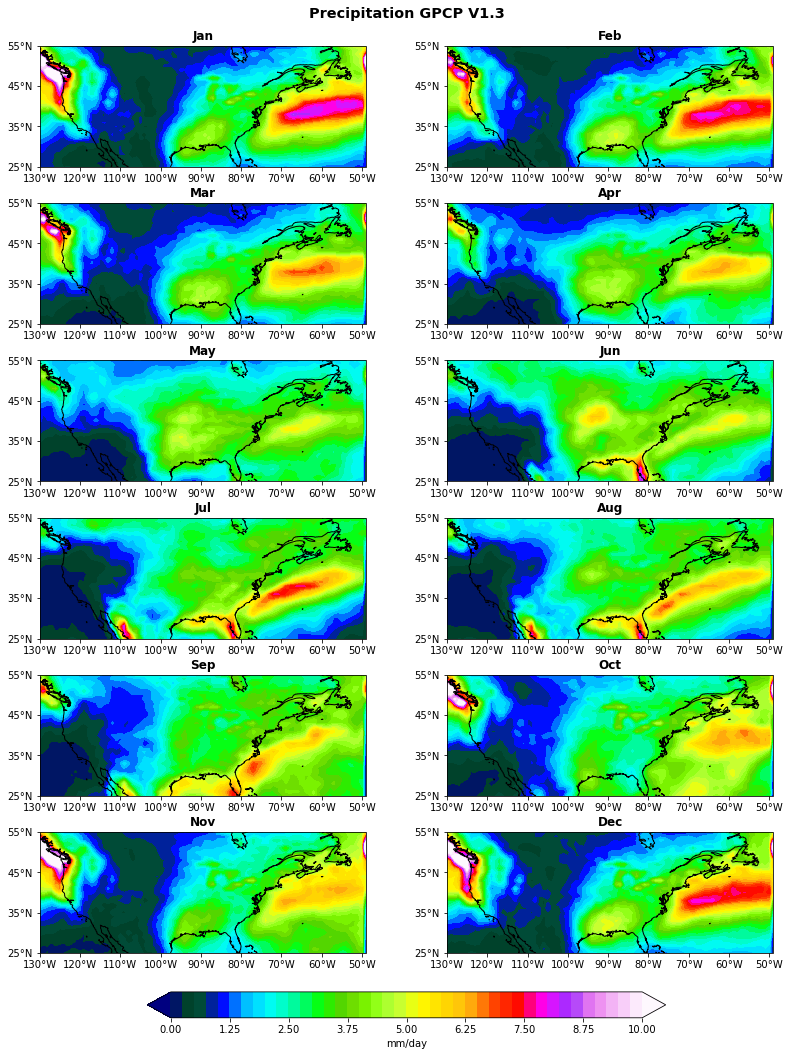

In [6]:
levels = np.linspace(0,10,41)
mons = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
fig, ax = plt.subplots(nrows=6,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(12,18))
ax=ax.flatten()
for x in range(0,12):
    data = months['precip'].isel(month=x)
    data,lons=add_cyclic_point(data,coord=months['longitude'])
    cs=ax[x].contourf(lons,months['latitude'], data,levels=levels,transform = ccrs.PlateCarree(),
                          cmap='gist_ncar',extend='both')
    ax[x].set_title(mons[x],weight='semibold')
    ax[x].coastlines()
    
    ax[x].set_xticks(np.arange(-130,-49,10), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    ax[x].xaxis.set_major_formatter(lon_formatter)
        
    ax[x].set_yticks(np.arange(25,56,10), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    ax[x].yaxis.set_major_formatter(lat_formatter)
    
fig.subplots_adjust(bottom=0.25, top=0.95, left=0.05, right=0.95, wspace=0.1, hspace=0.3)
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='mm/day')
plt.suptitle('Precipitation GPCP V1.3',fontsize='x-large',weight='bold')